<a href="https://colab.research.google.com/github/JairusTheAnalyst/JairusTheAnalyst/blob/main/Mini_Poject_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of Singular Values: 10
Compression Ratio: 10.59
Mean Squared Error (MSE): 215.08
PSNR (Peak Signal-to-Noise Ratio): 24.80 dB
--------------------------------------------------


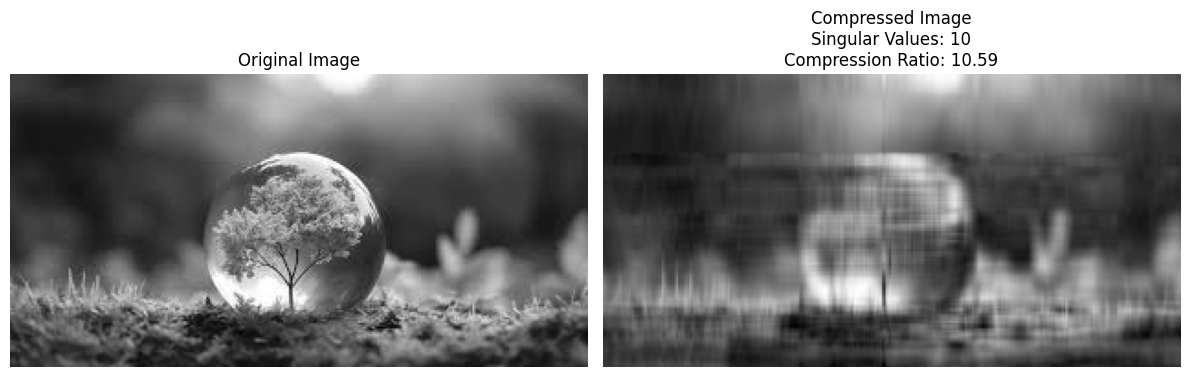

Number of Singular Values: 50
Compression Ratio: 2.12
Mean Squared Error (MSE): 21.95
PSNR (Peak Signal-to-Noise Ratio): 34.72 dB
--------------------------------------------------


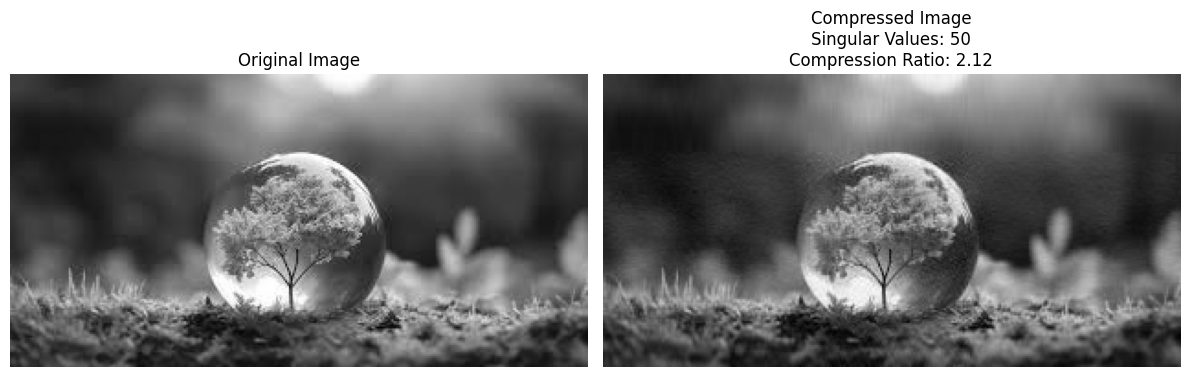

Number of Singular Values: 100
Compression Ratio: 1.06
Mean Squared Error (MSE): 0.75
PSNR (Peak Signal-to-Noise Ratio): 49.37 dB
--------------------------------------------------


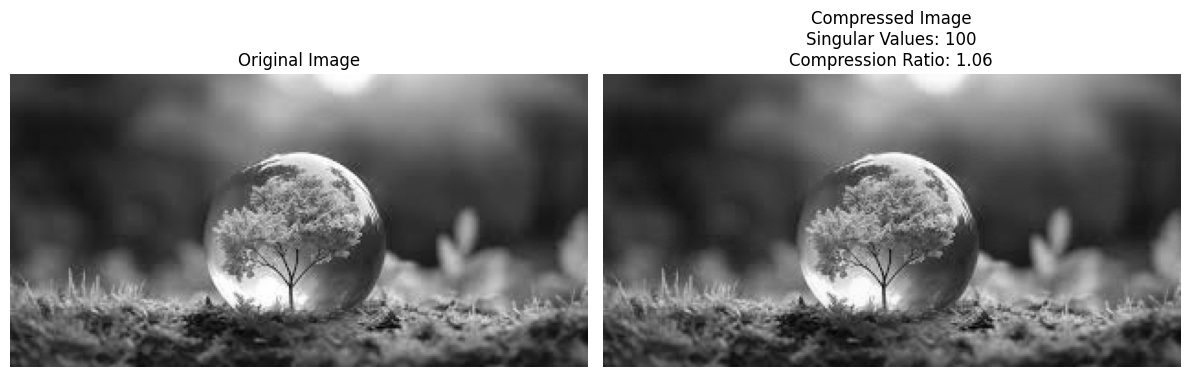

Number of Singular Values: 200
Compression Ratio: 0.53
Mean Squared Error (MSE): 0.00
PSNR (Peak Signal-to-Noise Ratio): 299.99 dB
--------------------------------------------------


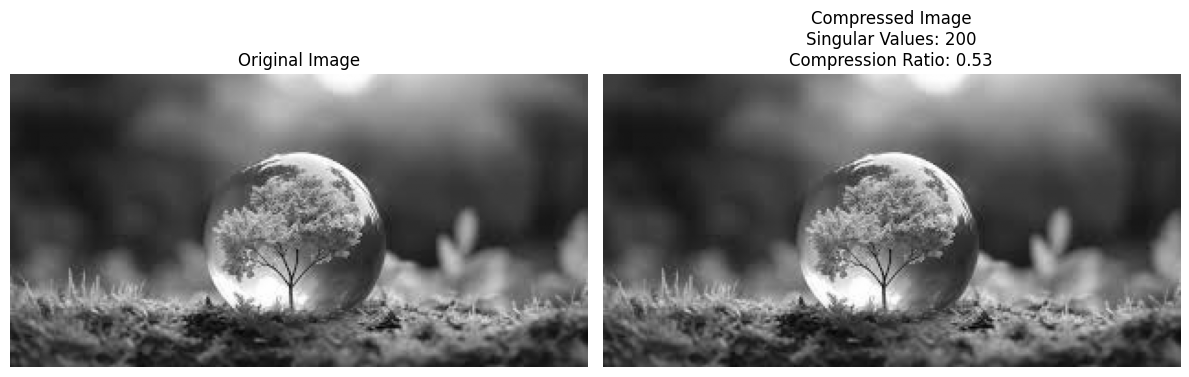

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# Function to load an image
def load_image(image_path):
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    return np.array(image)

# Function to perform SVD and compress the image
def svd_compress(image, num_singular_values):
    U, S, VT = np.linalg.svd(image, full_matrices=False)
    S_reduced = np.diag(S[:num_singular_values])
    U_reduced = U[:, :num_singular_values]
    VT_reduced = VT[:num_singular_values, :]
    image_reconstructed = np.dot(U_reduced, np.dot(S_reduced, VT_reduced))
    return image_reconstructed

# Function to calculate compression ratio
def calculate_compression_ratio(image, num_singular_values):
    m, n = image.shape
    # Total elements in compressed form: U + S + VT
    compressed_elements = num_singular_values * (1 + m + n)
    original_elements = m * n
    return original_elements / compressed_elements

# Function to evaluate image quality
def evaluate_quality(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if mse == 0:
        psnr = float('inf')
    else:
        psnr = 20 * np.log10(255.0 / np.sqrt(mse))
    return mse, psnr

# Function to plot images side by side
def plot_images(original, compressed, num_singular_values, compression_ratio):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    ax[0].imshow(original, cmap='gray')
    ax[0].set_title("Original Image")
    ax[0].axis('off')

    ax[1].imshow(compressed, cmap='gray')
    ax[1].set_title(f"Compressed Image\nSingular Values: {num_singular_values}\nCompression Ratio: {compression_ratio:.2f}")
    ax[1].axis('off')

    plt.tight_layout()
    plt.show()

# Main function to run the compression and evaluation process
def main(image_path, num_singular_values_list):
    # Load the image
    original_image = load_image(image_path)

    for num_singular_values in num_singular_values_list:
        compressed_image = svd_compress(original_image, num_singular_values)
        compression_ratio = calculate_compression_ratio(original_image, num_singular_values)
        mse, psnr = evaluate_quality(original_image, compressed_image)

        print(f"Number of Singular Values: {num_singular_values}")
        print(f"Compression Ratio: {compression_ratio:.2f}")
        print(f"Mean Squared Error (MSE): {mse:.2f}")
        print(f"PSNR (Peak Signal-to-Noise Ratio): {psnr:.2f} dB")
        print("-" * 50)

        plot_images(original_image, compressed_image, num_singular_values, compression_ratio)

# Entry point
if __name__ == "__main__":
    # Use the correct path to your image
    image_path = "/content/drive/MyDrive/DATASETS/SVA_image.jpg"

    # Different singular values to evaluate
    num_singular_values_list = [10, 50, 100, 200]

    if not os.path.exists(image_path):
        print(f"Image not found at {image_path}")
    else:
        main(image_path, num_singular_values_list)


| Metric                | Description                                                  |
| --------------------- | ------------------------------------------------------------ |
| **SVD**               | Decomposes image into U, Σ, Vᵀ for rank-k approximations     |
| **Compression Ratio** | Original size ÷ compressed size                              |
| **MSE**               | Mean squared error: measures pixel-wise reconstruction error |
| **PSNR**              | Peak Signal-to-Noise Ratio: higher is better (in dB)         |
